<a href="https://colab.research.google.com/github/DatadevWil/Estudo/blob/main/Estudo_Python_An%C3%A1lise_descritiva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color=red size=10>Despesas do Governo</font>
***

# <font color=LightSalmon size=5>1 - Análises iniciais e tratamento dos dados</font>
***

In [641]:
# Importação das bibliotecas de auxílio
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [642]:
from google.colab import drive

In [643]:
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [644]:
path = "/content/drive/My Drive/"

In [645]:
# Importando base de dados e criando um dataframe
base = pd.read_csv(path + 'Planilha12003a2022V3.csv',encoding = "latin1",sep=';')
base.head(2)
#base = pd.read_excel('Planilha12003a2022V2.xlsx')
#base.head(2)

,DATA PGTO,Fator de Conversão,CPF SERVIDOR,CPF/CNPJ FORNECEDOR,NOME FORNECEDOR,VALOR,TIPO,SUBELEMENTO DE DESPESA
0,01/01/2003 00:00,"3,1739553",***.010.008-**,"3,13E+13",JW TRANSPORTADORA TURÖSTICA,"1696,9",D,LOCACAO DE MEIOS DE TRANSPORTE
1,01/01/2003 00:00,"3,1739553",***.010.008-**,"3,13E+13",JW TRANSPORTADORA TURÖSTICA,"1336,6",D,LOCACAO DE MEIOS DE TRANSPORTE


In [646]:
# Retirando colunas indesejáveis
base = base.drop(columns=['CPF SERVIDOR','CPF/CNPJ FORNECEDOR'])
base.head(2)

,DATA PGTO,Fator de Conversão,NOME FORNECEDOR,VALOR,TIPO,SUBELEMENTO DE DESPESA
0,01/01/2003 00:00,"3,1739553",JW TRANSPORTADORA TURÖSTICA,"1696,9",D,LOCACAO DE MEIOS DE TRANSPORTE
1,01/01/2003 00:00,"3,1739553",JW TRANSPORTADORA TURÖSTICA,"1336,6",D,LOCACAO DE MEIOS DE TRANSPORTE


In [647]:
# Renomeando as colunas. Utilizando o método inplace é possível "salvar" a modificação
base.rename(columns={'DATA PGTO':'Data_Pagamento','NOME FORNECEDOR':'Fornecedor',
                     'SUBELEMENTO DE DESPESA':'Detalhamento'}, inplace = True)
base.head(2)

,Data_Pagamento,Fator de Conversão,Fornecedor,VALOR,TIPO,Detalhamento
0,01/01/2003 00:00,"3,1739553",JW TRANSPORTADORA TURÖSTICA,"1696,9",D,LOCACAO DE MEIOS DE TRANSPORTE
1,01/01/2003 00:00,"3,1739553",JW TRANSPORTADORA TURÖSTICA,"1336,6",D,LOCACAO DE MEIOS DE TRANSPORTE


In [648]:
# Identificando registros nulos da base de dados
base.isnull().sum()

Data_Pagamento        0
Fator de Conversão    0
Fornecedor            2
VALOR                 2
TIPO                  2
Detalhamento          2
dtype: int64

In [649]:
# Filtrando os registros nulos. NaN siginifica Not a Number
base[base['Fornecedor'].isnull()]

,Data_Pagamento,Fator de Conversão,Fornecedor,VALOR,TIPO,Detalhamento
113339,#VALOR!,#VALOR!,NaN,NaN,NaN,NaN
113340,#VALOR!,#VALOR!,NaN,NaN,NaN,NaN


In [650]:
# Eliminando os registros nulos e checando novamente como precaução. Observa-se que não há mais valores nulos.
base.dropna(subset = ['Fornecedor'], inplace = True)
base[base['Fornecedor'].isnull()]

,Data_Pagamento,Fator de Conversão,Fornecedor,VALOR,TIPO,Detalhamento


In [651]:
print(f'Essa base de dados contém {base.shape[0]} registros!')

Essa base de dados contém 113339 registros!


In [652]:
base.head(2)
base.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113339 entries, 0 to 113338
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Data_Pagamento      113339 non-null  object
 1   Fator de Conversão  113339 non-null  object
 2   Fornecedor          113339 non-null  object
 3   VALOR               113339 non-null  object
 4   TIPO                113339 non-null  object
 5   Detalhamento        113339 non-null  object
dtypes: object(6)
memory usage: 6.1+ MB


In [653]:
# mudando o formato da coluna de data
base['Data_Pagamento'] =  pd.to_datetime(base['Data_Pagamento'])
#datetime.strptime(str_date, '%Y-%m-%d').date()

base.head(2)

,Data_Pagamento,Fator de Conversão,Fornecedor,VALOR,TIPO,Detalhamento
0,2003-01-01,"3,1739553",JW TRANSPORTADORA TURÖSTICA,"1696,9",D,LOCACAO DE MEIOS DE TRANSPORTE
1,2003-01-01,"3,1739553",JW TRANSPORTADORA TURÖSTICA,"1336,6",D,LOCACAO DE MEIOS DE TRANSPORTE


In [654]:
# Criando uma coluna de anos
base['Ano'] = base['Data_Pagamento'].dt.year
base.head(2)

,Data_Pagamento,Fator de Conversão,Fornecedor,VALOR,TIPO,Detalhamento,Ano
0,2003-01-01,"3,1739553",JW TRANSPORTADORA TURÖSTICA,"1696,9",D,LOCACAO DE MEIOS DE TRANSPORTE,2003
1,2003-01-01,"3,1739553",JW TRANSPORTADORA TURÖSTICA,"1336,6",D,LOCACAO DE MEIOS DE TRANSPORTE,2003


In [655]:
base['Dia'] = base['Data_Pagamento'].dt.day
base['Mês'] = base['Data_Pagamento'].dt.month
base.head(2)

,Data_Pagamento,Fator de Conversão,Fornecedor,VALOR,TIPO,Detalhamento,Ano,Dia,Mês
0,2003-01-01,"3,1739553",JW TRANSPORTADORA TURÖSTICA,"1696,9",D,LOCACAO DE MEIOS DE TRANSPORTE,2003,1,1
1,2003-01-01,"3,1739553",JW TRANSPORTADORA TURÖSTICA,"1336,6",D,LOCACAO DE MEIOS DE TRANSPORTE,2003,1,1


In [656]:
# Identificando o presidente
base['Presidente'] = base['Ano'].apply(lambda x: 'Lula' if x <= 2010 else 'Dilma' if x <= 2016 else 'Temer' if x <= 2018 else 'Bolsonaro')
base.head()

,Data_Pagamento,Fator de Conversão,Fornecedor,VALOR,TIPO,Detalhamento,Ano,Dia,Mês,Presidente
0,2003-01-01,"3,1739553",JW TRANSPORTADORA TURÖSTICA,"1696,9",D,LOCACAO DE MEIOS DE TRANSPORTE,2003,1,1,Lula
1,2003-01-01,"3,1739553",JW TRANSPORTADORA TURÖSTICA,"1336,6",D,LOCACAO DE MEIOS DE TRANSPORTE,2003,1,1,Lula
2,2003-01-01,"3,1739553",JW TRANSPORTADORA TURÖSTICA,"1396,43",D,LOCACAO DE MEIOS DE TRANSPORTE,2003,1,1,Lula
3,2003-01-01,"3,1739553",FLORES ALVORADA,8585,C,OUTROS SERVIOS DE TERCEIROS-PESSOA JURÖDICA,2003,1,1,Lula
4,2003-01-01,"3,1739553",CRISTAL LIMPEZA - COMRCIO DE MATERIAIS PARA L...,"251,5",C,MATERIAL DE LIMPEZA E PROD. DE HIGIENIZAÇO,2003,1,1,Lula


In [657]:
# Realizando um tratamento na coluna do valores, fazendo a substituição da vírgula pelo ponto
base['VALOR'] = base['VALOR'].apply(lambda x: x.replace(',','.'))
base['Fator de Conversão'] = base['Fator de Conversão'].apply(lambda x: x.replace(',','.'))
base.head()

,Data_Pagamento,Fator de Conversão,Fornecedor,VALOR,TIPO,Detalhamento,Ano,Dia,Mês,Presidente
0,2003-01-01,3.1739553,JW TRANSPORTADORA TURÖSTICA,1696.9,D,LOCACAO DE MEIOS DE TRANSPORTE,2003,1,1,Lula
1,2003-01-01,3.1739553,JW TRANSPORTADORA TURÖSTICA,1336.6,D,LOCACAO DE MEIOS DE TRANSPORTE,2003,1,1,Lula
2,2003-01-01,3.1739553,JW TRANSPORTADORA TURÖSTICA,1396.43,D,LOCACAO DE MEIOS DE TRANSPORTE,2003,1,1,Lula
3,2003-01-01,3.1739553,FLORES ALVORADA,8585,C,OUTROS SERVIOS DE TERCEIROS-PESSOA JURÖDICA,2003,1,1,Lula
4,2003-01-01,3.1739553,CRISTAL LIMPEZA - COMRCIO DE MATERIAIS PARA L...,251.5,C,MATERIAL DE LIMPEZA E PROD. DE HIGIENIZAÇO,2003,1,1,Lula


In [658]:
# Convertendo o número da coluna 'VALOR' para float
base['VALOR'] = base['VALOR'].apply(lambda x: float(x))
base['Fator de Conversão'] = base['Fator de Conversão'].apply(lambda x: float(x))

In [659]:
base['VALOR'] = base['VALOR'].apply(lambda x: x*(-1) if x < 0 else x)

In [660]:
print(base['VALOR'].min())
print(base['VALOR'].max())

0.0
312903.36


In [661]:
# Criando uma coluna nova com o valor corrigido pela inflação que é de 328,62%
base.loc[base['Ano'] < 2022, 'Valor_Corrigido'] = (base['VALOR'] * base['Fator de Conversão'])
base.loc[(base['Ano'] == 2022) & (base['Mês'] < 12), 'Valor_Corrigido'] = (base['VALOR'] * base['Fator de Conversão'])
# Ao realizar o método acima os valores de 2022 ficaram como NaN, para corrigir usei o mesmo método
base.loc[(base['Ano'] == 2022) & (base['Mês'] == 12), 'Valor_Corrigido'] = base['VALOR']

In [662]:
base['Valor_Corrigido'] = base['Valor_Corrigido'].apply(lambda x: int(x))

# <font color=LightSalmon size=5>2 - Análises descritivas</font>
***

In [663]:
# Tabela de frequência, faz sentido o Lula ser o maior pois teve 2 mandatos
frequencia = base['Presidente'].value_counts()
frequencia

Lula         65869
Dilma        26409
Bolsonaro    13339
Temer         7722
Name: Presidente, dtype: int64

In [664]:
percentual = base['Presidente'].value_counts(normalize = True) * 100
percentual

Lula         58.116800
Dilma        23.300894
Bolsonaro    11.769117
Temer         6.813189
Name: Presidente, dtype: float64

In [665]:
dist_freq = pd.DataFrame({'Frequência':frequencia, 'Percentual(%)':percentual})
dist_freq.rename_axis('Presidente',axis = 'columns', inplace = True)
dist_freq

Presidente,Frequência,Percentual(%)
Lula,65869,58.116800
Dilma,26409,23.300894
Bolsonaro,13339,11.769117
Temer,7722,6.813189


In [666]:
# Valores gastos pelos presidentes, faz sentido pois Lula ficu mais tempo no poder
valor_presidente = base.groupby(['Presidente']).agg({'Valor_Corrigido':'sum'}).reset_index()
valor_presidente.sort_values(by=['Valor_Corrigido'], ascending=False,inplace=True)

In [667]:
# Mesmo Lula tendo sido o presidente que mais gastou, a maior média de valores gastos ficou com Bolsonaro
media_presidente = base.groupby(['Presidente']).agg({'Valor_Corrigido':'mean'}).reset_index()
media_presidente.sort_values(by=['Valor_Corrigido'], ascending=False,inplace=True)

In [668]:
detalhamento_soma = base.groupby(['Detalhamento']).agg({'Valor_Corrigido':'sum'}).reset_index()
detalhamento_soma.sort_values(by=['Valor_Corrigido'], ascending=False,inplace=True)

In [669]:
detalhamento_soma['Pareto'] = (detalhamento_soma['Valor_Corrigido']/detalhamento_soma['Valor_Corrigido'].sum())*100
detalhamento_soma = detalhamento_soma.head(4)
detalhamento_soma

,Detalhamento,Valor_Corrigido,Pareto
32,HOSPEDAGENS,99525892,47.279696
35,LOCACAO DE MEIOS DE TRANSPORTE,30887289,14.672982
31,GENEROS DE ALIMENTAÇO,28377014,13.480478
28,FORNECIMENTO DE ALIMENTAÇO,23733026,11.274355


In [670]:
ano_media = base.groupby(['Ano']).agg({'Valor_Corrigido':'mean'}).reset_index()
ano_media.sort_values(by=['Ano'], ascending=True,inplace=True)
ano_media

,Ano,Valor_Corrigido
0,2003,3274.539836
1,2004,2784.652879
2,2005,1811.868351
3,2006,1230.904771
4,2007,1121.504248
5,2008,1520.364760
6,2009,1341.946853
7,2010,1321.837414
8,2011,1902.425212
9,2012,2180.643843


In [671]:
print(f'Observa-se que {detalhamento_soma["Pareto"].head(4).sum().round(2)}% dos valores gastos pelos presidentes está concentrado em apenas 4 categorias!')

Observa-se que 86.71% dos valores gastos pelos presidentes está concentrado em apenas 4 categorias!


In [672]:
print(base['Valor_Corrigido'].max())
print(base['Valor_Corrigido'].min())
print(base['Valor_Corrigido'].median())
print(base['Valor_Corrigido'].mode())

649994
0
602.0
0    10
dtype: int64


In [673]:
dilma = base.query('Valor_Corrigido > 200000 & Presidente == "Dilma"')
dilma

,Data_Pagamento,Fator de Conversão,Fornecedor,VALOR,TIPO,Detalhamento,Ano,Dia,Mês,Presidente,Valor_Corrigido
79023,2014-01-03,1.68,FIESTA BAHIA HOTEL LTDA,130985.0,C,HOSPEDAGENS,2014,3,1,Dilma,220054
81279,2014-01-07,1.64,MARINA DE IRACEMA PARK S.A.,139628.4,C,HOSPEDAGENS,2014,7,1,Dilma,228990


In [674]:
lula = base.query('Valor_Corrigido > 600000 & Presidente == "Lula"')
lula

,Data_Pagamento,Fator de Conversão,Fornecedor,VALOR,TIPO,Detalhamento,Ano,Dia,Mês,Presidente,Valor_Corrigido
46372,2008-01-12,2.24,SAUIPE S.A - SAUIPE PARK,290176.0,C,HOSPEDAGENS,2008,12,1,Lula,649994


In [675]:
temer = base.query('Valor_Corrigido > 100000 & Presidente == "Temer"')
temer

,Data_Pagamento,Fator de Conversão,Fornecedor,VALOR,TIPO,Detalhamento,Ano,Dia,Mês,Presidente,Valor_Corrigido
96780,2018-01-01,1.32,PRIVATPORT SA,114541.60,C,"SERV.DE APOIO ADMIN.,TECNICO E OPERACIONAL",2018,1,1,Temer,151194
96781,2018-01-01,1.32,PRIVATPORT SA,80228.86,C,"SERV.DE APOIO ADMIN.,TECNICO E OPERACIONAL",2018,1,1,Temer,105902


In [676]:
bolsonaro = base.query('Valor_Corrigido > 300000 & Presidente == "Bolsonaro"')
bolsonaro

,Data_Pagamento,Fator de Conversão,Fornecedor,VALOR,TIPO,Detalhamento,Ano,Dia,Mês,Presidente,Valor_Corrigido
106517,2021-01-01,1.16,HOTUR S PAULO PART E EMPR LTDA,312903.36,C,HOSPEDAGENS,2021,1,1,Bolsonaro,362967


In [677]:
#maiores

In [678]:
soma_ano = pd.crosstab(base['Ano'],
                         base['Presidente'], aggfunc= 'sum',
                         values = base['Valor_Corrigido'])
soma_ano.fillna(0,inplace = True)
soma_ano

Presidente,Bolsonaro,Dilma,Lula,Temer
Ano,,,,
2003,0.0,0.0,15947009.0,0.0
2004,0.0,0.0,18378709.0,0.0
2005,0.0,0.0,13625250.0,0.0
2006,0.0,0.0,12512147.0,0.0
2007,0.0,0.0,9372411.0,0.0
2008,0.0,0.0,13900695.0,0.0
2009,0.0,0.0,11917830.0,0.0
2010,0.0,0.0,13658546.0,0.0
2011,0.0,8979447.0,0.0,0.0


In [679]:
media_ano = pd.crosstab(base['Ano'],
                         base['Presidente'], aggfunc= 'mean',
                         values = base['Valor_Corrigido'])
media_ano.fillna(0,inplace = True)
media_ano

Presidente,Bolsonaro,Dilma,Lula,Temer
Ano,,,,
2003,0.000000,0.000000,3274.539836,0.000000
2004,0.000000,0.000000,2784.652879,0.000000
2005,0.000000,0.000000,1811.868351,0.000000
2006,0.000000,0.000000,1230.904771,0.000000
2007,0.000000,0.000000,1121.504248,0.000000
2008,0.000000,0.000000,1520.364760,0.000000
2009,0.000000,0.000000,1341.946853,0.000000
2010,0.000000,0.000000,1321.837414,0.000000
2011,0.000000,1902.425212,0.000000,0.000000


In [680]:
soma_fornecedor = base.groupby(['Fornecedor']).agg({'Valor_Corrigido':'sum'}).reset_index()
soma_fornecedor.sort_values(by=['Valor_Corrigido'], ascending=False)
soma_fornecedor = soma_fornecedor.nlargest(100,'Valor_Corrigido')
soma_fornecedor

,Fornecedor,Valor_Corrigido
5414,MERCADINHO LA PALMA LTDA,6349117
3285,FULL TIME LOCAÇO E SERVIOS S/C LTDA,5720219
2004,COMPANHIA BRASILEIRA DE DISTRIBUIÇO,4555999
1175,BOURBON IBIRAPUERA HOTEL & CONVENTION,4404789
5953,P.J.P. LOCAåES E SERVIOS LTDA - BRASÖLIA RENT A,3274722
...,...,...
5796,NOVOTEL JARAGUA SÇO PAULO CONVENTIONS,409813
1312,C.A.S. LOCAÇO E SERVIOS LTDA,408706
2006,COMPANHIA BRASILEIRA DE DISTRIBUIÇO PÇO DE A...,405448
1779,CIA BRAS DE DISTRIB. - EXTRA,402471


In [681]:
media_fornecedor = base.groupby(['Fornecedor']).agg({'Valor_Corrigido':'mean'}).reset_index()
media_fornecedor.sort_values(by=['Valor_Corrigido'], ascending=False)
media_fornecedor = media_fornecedor.nlargest(100,'Valor_Corrigido')

In [682]:
media_fornecedor

,Fornecedor,Valor_Corrigido
7660,SHOWïS ESTRUTURAS E EVENTOS LTDA - ME,277788.0
3999,HOTUR S PAULO PART E EMPR LTDA,165737.5
1519,CASA GRANDE HOTEL S/A,140416.0
4911,"LSG SKY CHEFS PHILADELPHIA, PA",107419.0
3970,HOTEL ZIBAMBA,105378.0
...,...,...
5554,MORADA LOCADORA DE VEICULOS LTDA,27703.5
5486,MILLION AIR,27583.0
3936,HOTEL SLAVIERO JARDINS LTDA,27310.0
4488,JULIANA GONALVES FERRAS,27227.0


# <font color=LightSalmon size=5>3 - Visualizações</font>
***

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0, flags=flags)


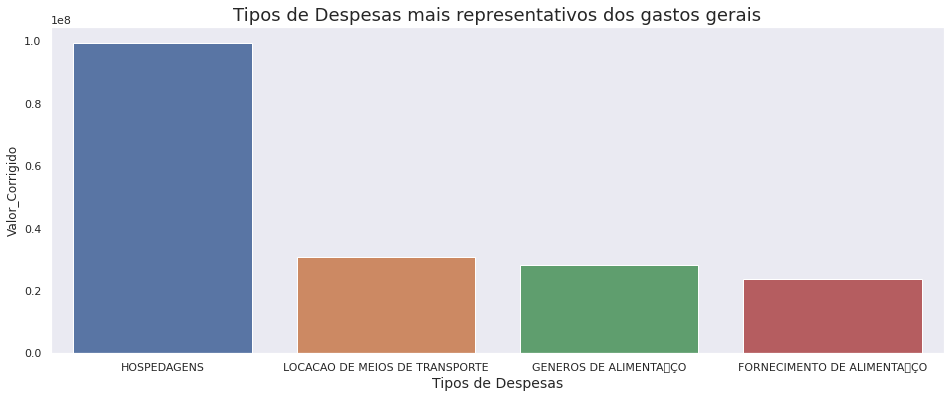

In [683]:
sns.set_theme(style='dark')
grafico1 = sns.barplot(x = 'Detalhamento', y = "Valor_Corrigido", data = detalhamento_soma)
grafico1.figure.set_size_inches(16,6)
grafico1.set_title('Tipos de Despesas mais representativos dos gastos gerais', fontsize = 18)
grafico1.set_xlabel('Tipos de Despesas', fontsize = 14)
grafico1

Text(0.5, 0, 'Total de despesas')

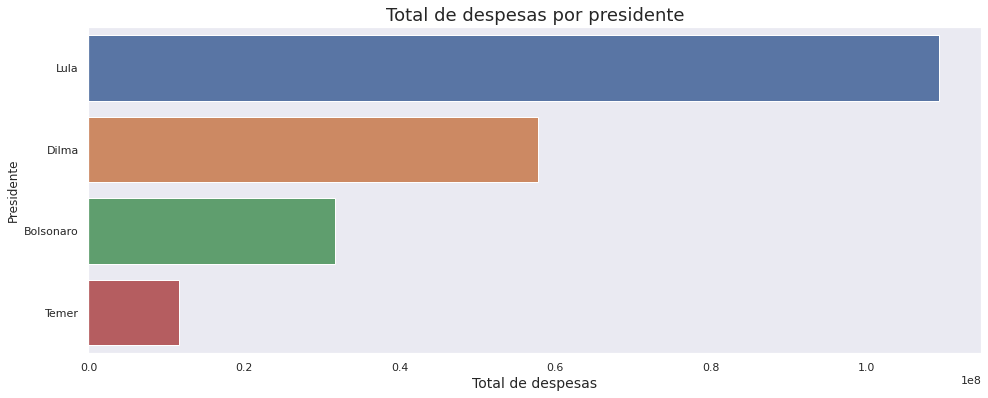

In [684]:
grafico2 = sns.barplot(x='Valor_Corrigido',y='Presidente',data=valor_presidente)
grafico2.figure.set_size_inches(16,6)
grafico2.set_title('Total de despesas por presidente', fontsize = 18)
grafico2.set_xlabel('Total de despesas', fontsize = 14)

Text(0.5, 0, 'Média de despesas')

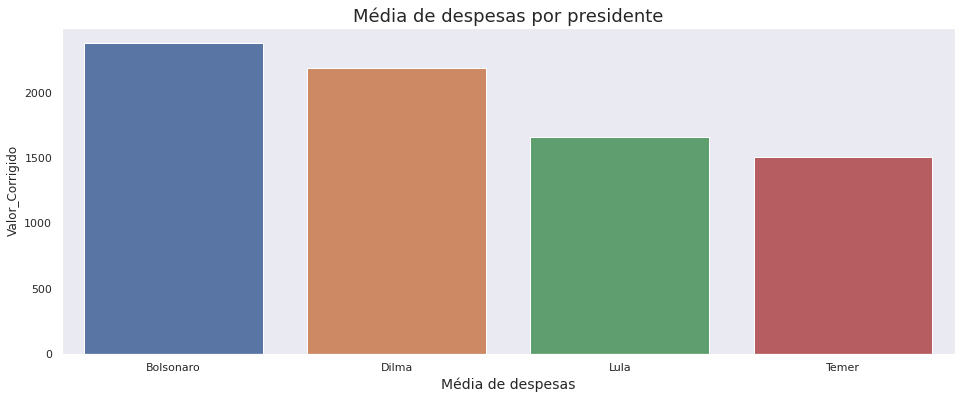

In [685]:
grafico3 = sns.barplot(x='Presidente',y='Valor_Corrigido',data=media_presidente)
grafico3.figure.set_size_inches(16,6)
grafico3.set_title('Média de despesas por presidente', fontsize = 18)
grafico3.set_xlabel('Média de despesas', fontsize = 14)

Text(0.5, 0, 'Média de despesas')

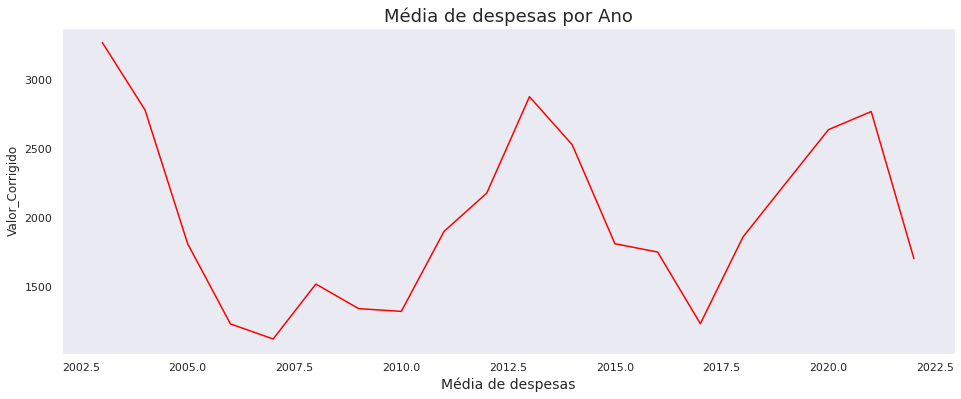

In [686]:
grafico4 = sns.lineplot(x='Ano',y='Valor_Corrigido',data=ano_media, color = 'red')
grafico4.figure.set_size_inches(16,6)
grafico4.set_title('Média de despesas por Ano', fontsize = 18)
grafico4.set_xlabel('Média de despesas', fontsize = 14)

In [705]:
valor = base['Valor_Corrigido']
Q1 = valor.quantile(.25)
Q2 = valor.median()
Q3 = valor.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

print('Primeiro Quartil {}\nSegundo Quartil {}\nTerceiro Quartil {}\nIntervalo Interquartil {}'.format(Q1,Q2,Q3,IIQ))
print(limite_inferior)
print(limite_superior)

Primeiro Quartil 216.0
Segundo Quartil 602.0
Terceiro Quartil 1395.0
Intervalo Interquartil 1179.0
-1552.5
3163.5


In [694]:
selecao = (valor >= limite_inferior) & (valor<=limite_superior)
dados_new = base[selecao]
dados_new

,Data_Pagamento,Fator de Conversão,Fornecedor,VALOR,TIPO,Detalhamento,Ano,Dia,Mês,Presidente,Valor_Corrigido
4,2003-01-01,3.173955,CRISTAL LIMPEZA - COMRCIO DE MATERIAIS PARA L...,251.50,C,MATERIAL DE LIMPEZA E PROD. DE HIGIENIZAÇO,2003,1,1,Lula,798
5,2003-01-01,3.173955,SEBASTIÇO ALVES DE SOUSA - ME,105.00,D,MATERIAL P/MANUTENÇO DE BENS MàVEIS,2003,1,1,Lula,333
6,2003-01-01,3.173955,JOÇO LEITE NETO - ME - JLN ELETRONICOS,200.00,D,MATERIAL P/MANUTENÇO DE BENS MàVEIS,2003,1,1,Lula,634
9,2003-01-01,3.173955,COMPANHIA BRASILEIRA DE DISTRIBUIÇO,716.40,C,GENEROS DE ALIMENTAÇO,2003,1,1,Lula,2273
10,2003-01-01,3.173955,CIA BRAS. DE DISTRIB.,70.71,C,GENEROS DE ALIMENTAÇO,2003,1,1,Lula,224
...,...,...,...,...,...,...,...,...,...,...,...
113334,2022-01-12,1.010000,OUTBACK STEAKHOUSE RESTAURANTES BRASIL S/A,179.50,C,FORNECIMENTO DE ALIMENTAÇO,2022,12,1,Bolsonaro,181
113335,2022-01-12,1.010000,BIOMUNDO 105 NORTE COMERCIO DE ALIMENTOS,54.95,C,GENEROS DE ALIMENTAÇO,2022,12,1,Bolsonaro,55
113336,2022-01-12,1.010000,COMPANHIA BRASILEIRA DE DISTRIBUIÇO,518.07,C,GENEROS DE ALIMENTAÇO,2022,12,1,Bolsonaro,523
113337,2022-01-12,1.010000,RESTAURANTE SOHO,330.52,C,FORNECIMENTO DE ALIMENTAÇO,2022,12,1,Bolsonaro,333


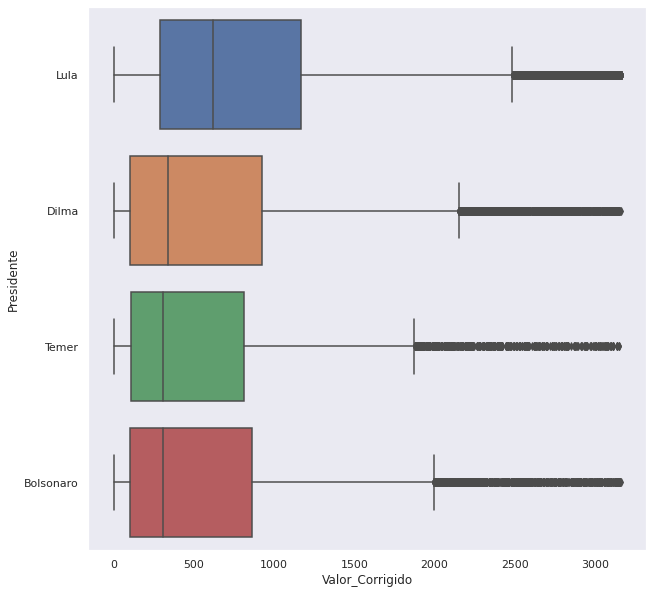

In [706]:
plt.figure(figsize=(10,10))
grafico = sns.boxplot(x = dados_new['Valor_Corrigido'],y=dados_new['Presidente'],data=dados_new,orient='h')
grafico

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


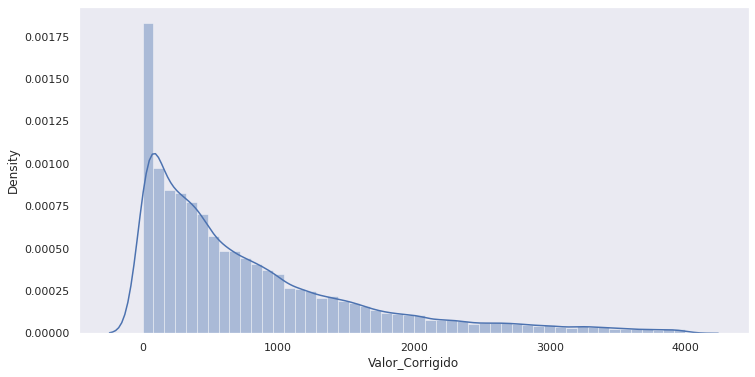

In [696]:
ax = sns.distplot(base.query('Valor_Corrigido < 4000').Valor_Corrigido)
ax.figure.set_size_inches(12,6)
ax